In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
def count_schools(file = "Data/locations.csv",colname = "distname"):
    locations = dict()
    for block in pd.read_csv(file,chunksize=1000,iterator=True):
        for dist in block[colname]:
            if dist not in locations:
                locations[dist] = 1
            else:
                locations[dist] +=1
    return locations

In [7]:
def count_frequency(file_name ,colname_list):
    import math
    import pandas as pd
    dic_1 = dict()
    for block in pd.read_csv(file_name,chunksize=1000,iterator=True):
        for col in colname_list:
            dic_2 = dict()
            for c in block[col]:
                if pd.isna(c):
                    c = "Not Available"
                if c not in dic_2:
                    dic_2[c] = 1
                else:
                    dic_2[c] +=1
            dic_1[col] = dic_2
    return dic_1

In [8]:
def get_header(file_name):
    import csv
    with open(file_name) as csvfile:
        reader = csv.DictReader(csvfile)
        lst = next(reader).keys()
    return lst

# Checking Trends in increase in the schools over the years

## Get the year of establishment column of the schools

In [9]:
basic_file = "/home/flash/Desktop/Basics.csv"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
header = get_header(basic_file)

In [11]:
import re

a = filter(lambda x: re.search('EST*',x),header)

In [12]:
a

['SEC_RESI_SCHOOL_YN',
 'ESTDYEAR',
 'PRI_RESI_SCHOOL_YN',
 'SCHTYPES',
 'CCESEC_YN',
 'UP_RESI_SCHOOL_YN',
 'RESIDENTIAL_TYPE',
 'HSEC_RESI_SCHOOL_YN']

In [13]:
year_of_establishment = []
for chunk in pd.read_csv(basic_file,iterator=True,parse_dates=True,chunksize=1000):
    year_of_establishment = np.append(year_of_establishment,chunk['ESTDYEAR'])

In [14]:
year_of_establishment.sort()

In [15]:
year_of_establishment

array([   9., 1723., 1723., ...,   nan,   nan,   nan])

In [16]:
df = pd.DataFrame(year_of_establishment,columns=['Year'])

In [17]:
df.describe()

,Year
count,106486.000000
mean,1973.549039
std,30.542217
min,9.000000
25%,1956.000000
50%,1978.000000
75%,1999.000000
max,2014.000000


In [18]:
(1999-1956)*1.5

64.5

In [19]:
from collections import Counter

# Calculating No. of schools in each district over the years

In [20]:
def school_dist_years(basic_file,dist_list):
    import numpy as np
    year_of_establishment = []
    for dist in dist_list:
        for chunk in pd.read_csv(basic_file,iterator=True,parse_dates=True,chunksize=1000):
            chunk = chunk[chunk['DISTNAME']==dist]
            year_of_establishment = np.append(year_of_establishment,chunk['ESTDYEAR'])
        yield year_of_establishment,str(dist)
        year_of_establishment = []

In [21]:
from __future__ import division
def ecdf(lst):
    n = len(lst)
    x = np.sort(lst)
    y = np.arange(1,n+1)/n
    return x,y

In [22]:
x,y = ecdf(df)

In [23]:
districts = ['RATNAGIRI',
 'NANDURBAR',
 'SOLAPUR',
 'PALGHAR',
 'CHANDRAPUR',
 'AMRAVATI',
 'NASHIK',
 'DHULE',
 'AHMADNAGAR',
 'PUNE',
 'AURANGABAD (MAHARASHTRA)',
 'BID',
 'GADCHIROLI',
 'NAGPUR',
 'WARDHA',
 'KOLHAPUR',
 'SANGLI',
 'NANDED',
 'BHANDARA',
 'MUMBAI II',
 'JALGAON',
 'THANE',
 'GONDIYA',
 'OSMANABAD',
 'PARBHANI',
 'MUMBAI (SUBURBAN)',
 'RAIGARH (MAHARASHTRA)',
 'YAVATMAL',
 'AKOLA',
 'SATARA',
 'SINDHUDURG',
 'WASHIM',
 'HINGOLI',
 'JALNA',
 'LATUR',
 'BULDANA']

In [27]:
basic_file="/home/flash/Desktop/Basics.csv"
a = school_dist_years(basic_file,districts)

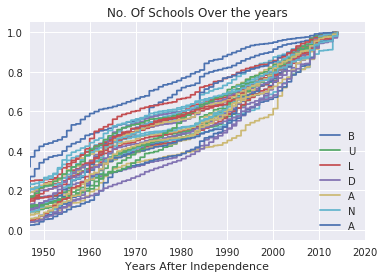

In [28]:
import seaborn as sn
sn.set()
sn.choose_cubehelix_palette
for lst,dist in a:
    x,y=ecdf(lst)
    plt.plot(x,y);
    plt.xlim(1947,2020)
    plt.xlabel("Years After Independence")
    plt.title("No. Of Schools Over the years")
    plt.legend(dist)

plt.show()

RATNAGIRI


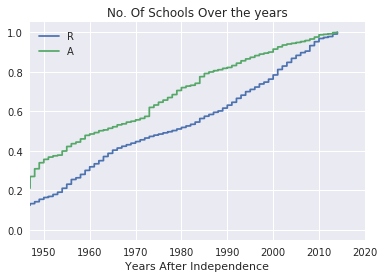

NANDURBAR


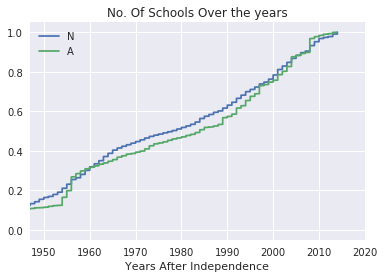

SOLAPUR


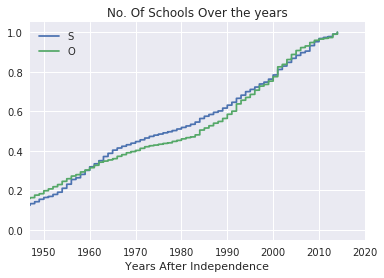

PALGHAR


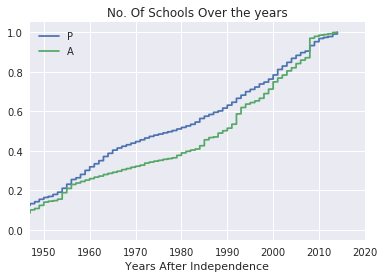

CHANDRAPUR


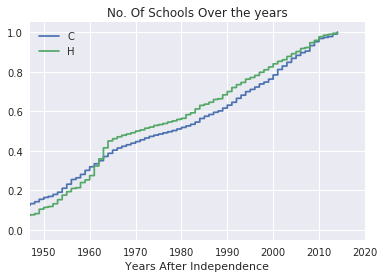

AMRAVATI


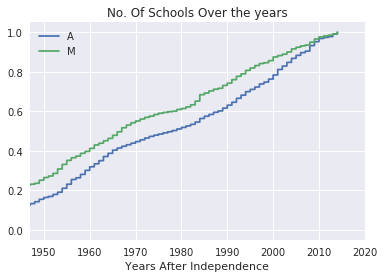

NASHIK


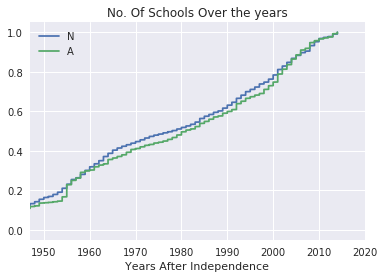

DHULE


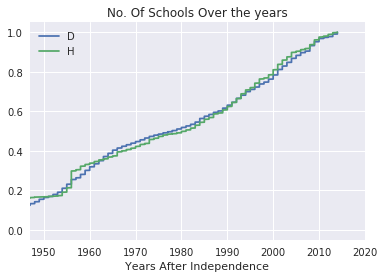

AHMADNAGAR


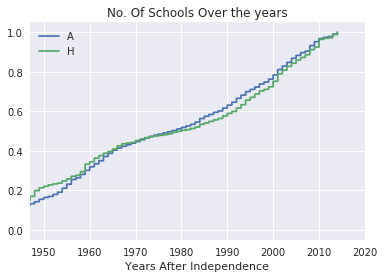

PUNE


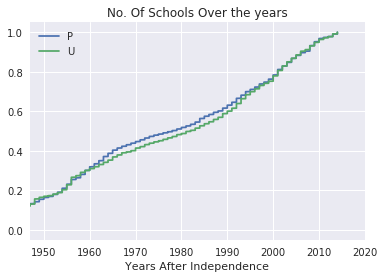

AURANGABAD (MAHARASHTRA)


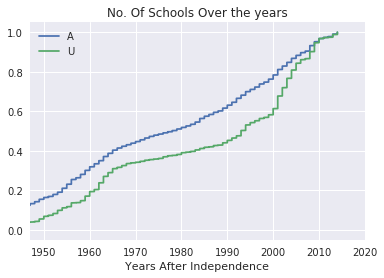

BID


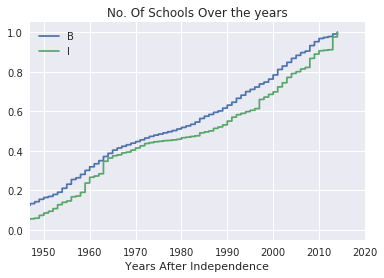

GADCHIROLI


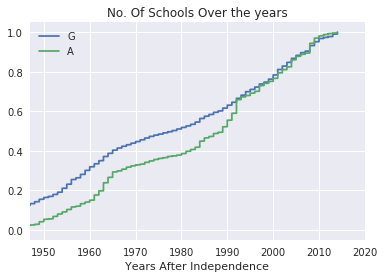

NAGPUR


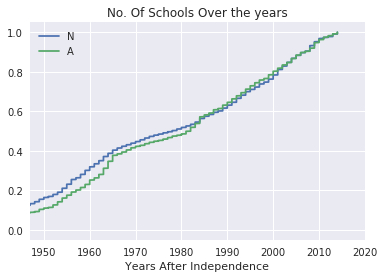

WARDHA


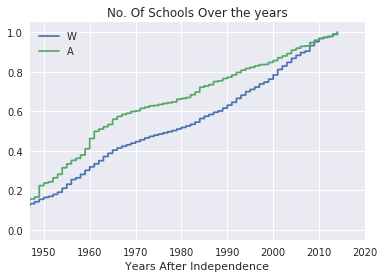

KOLHAPUR


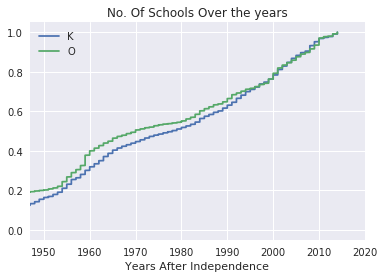

SANGLI


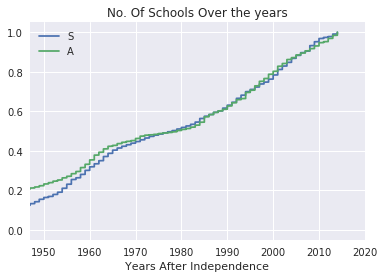

NANDED


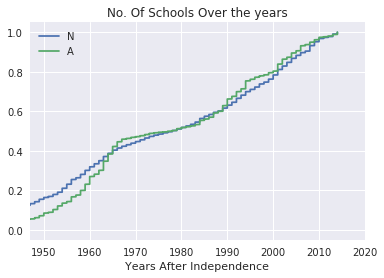

BHANDARA


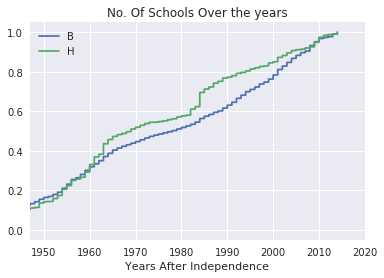

MUMBAI II


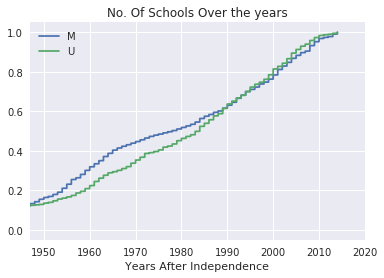

JALGAON


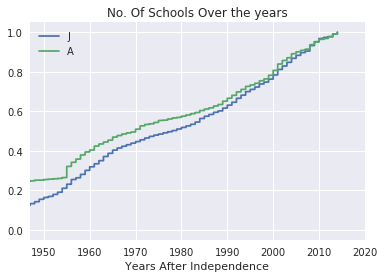

THANE


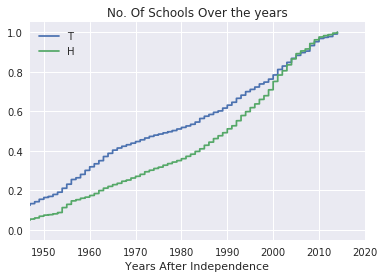

GONDIYA


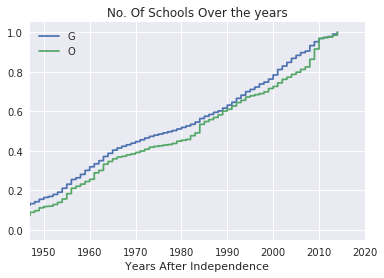

OSMANABAD


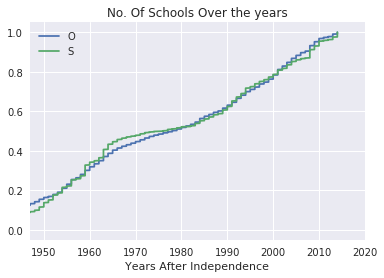

PARBHANI


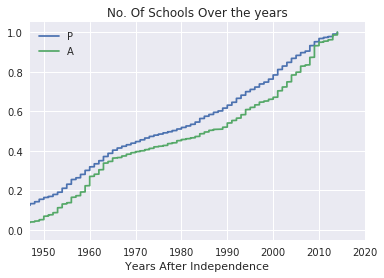

MUMBAI (SUBURBAN)


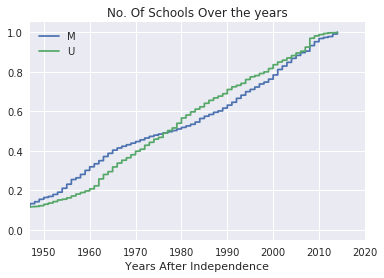

RAIGARH (MAHARASHTRA)


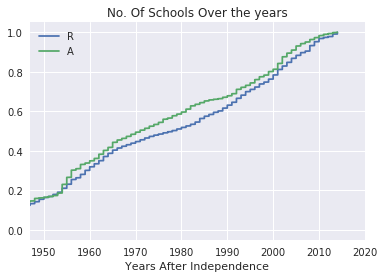

YAVATMAL


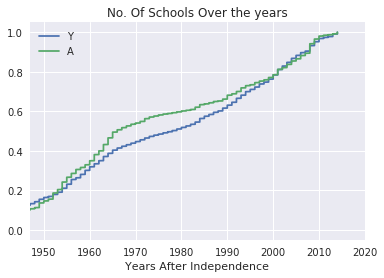

AKOLA


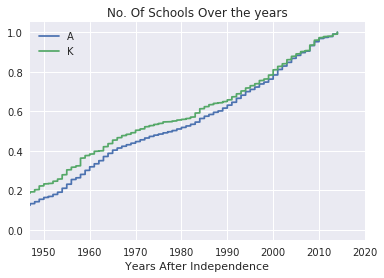

SATARA


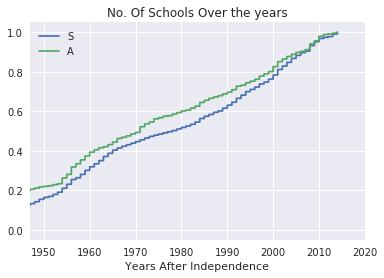

SINDHUDURG


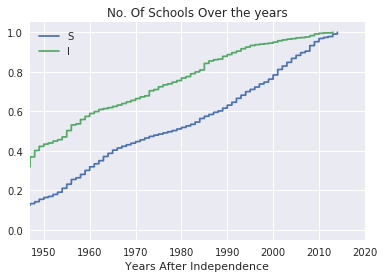

WASHIM


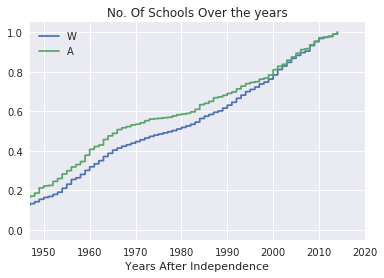

HINGOLI


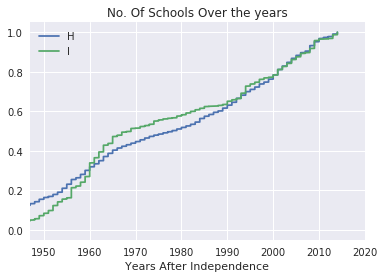

JALNA


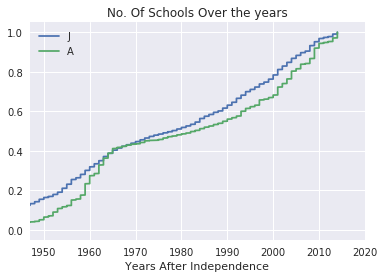

LATUR


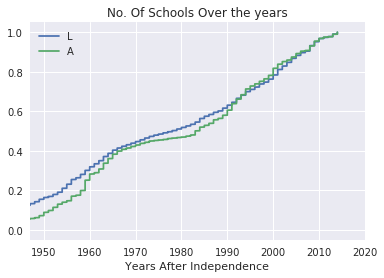

BULDANA


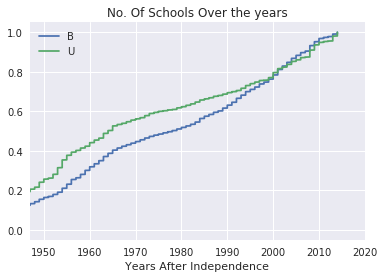

In [32]:
#Plotting and comparing the increase rate with the global trend in growth
x_all,y_all = ecdf(df)
a = school_dist_years(basic_file,districts)
import seaborn as sn
sn.set()
sn.choose_cubehelix_palette
for lst,dist in a:
    print(dist)
    x,y=ecdf(lst)
    _ = plt.plot(x_all,y_all)
    _ = plt.legend("Over All")
    _ = plt.plot(x,y);
    _ = plt.xlim(1947,2020)
    _ = plt.xlabel("Years After Independence")
    _ = plt.title("No. Of Schools Over the years")
    _ = plt.legend(dist)
    plt.show()